# Task 3 :  NLP

Assignment 

First Import required libraries 

In [1]:
# Data Manipulation
import pandas as pd 
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


# Warning messages
import warnings

# Step 1 : Process the data 

Importing the dataset 

In [2]:
data = pd.read_excel("/home/vikasmanjeda/Downloads/flipkart_com-ecommerce_sample.xlsx")

In [3]:
# First Five rows of the dataset 
data.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [4]:
# Last five rows of the dataset
data.tail()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
19995,7179d2f6c4ad50a17d014ca1d2815156,2015-12-01 10:15:43 +0000,http://www.flipkart.com/walldesign-small-vinyl...,WallDesign Small Vinyl Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7KFJAKSTDY9G,1500.0,730.0,"[""http://img6a.flixcart.com/image/wall-decorat...",False,Buy WallDesign Small Vinyl Sticker for Rs.730 ...,No rating available,No rating available,WallDesign,"{""product_specification""=>[{""key""=>""Number of ..."
19996,71ac419198359d37b8fe5e3fffdfee09,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE9F5URNQGJCGH,1429.0,1143.0,"[""http://img6a.flixcart.com/image/sticker/z/g/...",False,Buy Wallmantra Large Vinyl Stickers Sticker fo...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
19997,93e9d343837400ce0d7980874ece471c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7VAYDKQZEBSD,1299.0,999.0,"[""http://img5a.flixcart.com/image/sticker/b/s/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."
19998,669e79b8fa5d9ae020841c0c97d5e935,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE8YSVEPPCZ42Y,1499.0,1199.0,"[""http://img5a.flixcart.com/image/sticker/4/2/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."
19999,cb4fa87a874f715fff567f7b7b3be79c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88KN9ZDSGZKY,1499.0,999.0,"[""http://img6a.flixcart.com/image/sticker/z/k/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."


In [5]:
# Check the Shape of dataset
data.shape

(20000, 15)

In [6]:
# Checking the Columns name in the dataset 
data.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [7]:
# Checking the Summary of the dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

In [8]:
# Statistics summary 
data.describe()

,retail_price,discounted_price
count,19922.000000,19922.000000
mean,2979.206104,1973.401767
std,9009.639341,7333.586040
min,35.000000,35.000000
25%,666.000000,350.000000
50%,1040.000000,550.000000
75%,1999.000000,999.000000
max,571230.000000,571230.000000


# Step 2 : Data cleaning 

In [9]:
# Checking the null value in data 
data.isnull().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

From above table show that:
1. There are 5864 items that do not have a brand name.
2. There are 14 items that do not have a product specification.
3. There are 2 items that do not have a description.
4. There are 78 items that do not have a retail and discounted price.


 In brand, there are 5864 values missing. Instead of dropna method we'll use fillna method to replace missing values because it contain 30% of data & if we use dropna method than it remove 5864(30% of data) rows that contain a NaN value.

In [10]:
data['brand'].fillna(value='missing', inplace=True)

In [11]:
data['brand'].isna().sum()

0

Now we drop Na value present in our dataset.It is present in very small number we use dropna method to remove the na values 

In [12]:
data = data.dropna()

In [13]:
data.isnull().sum()

uniq_id                    0
crawl_timestamp            0
product_url                0
product_name               0
product_category_tree      0
pid                        0
retail_price               0
discounted_price           0
image                      0
is_FK_Advantage_product    0
description                0
product_rating             0
overall_rating             0
brand                      0
product_specifications     0
dtype: int64

In [14]:
# Checking the date_time format 

data["crawl_timestamp"].head(5)

0    2016-03-25 22:59:23 +0000
1    2016-03-25 22:59:23 +0000
2    2016-03-25 22:59:23 +0000
3    2016-03-25 22:59:23 +0000
4    2016-03-25 22:59:23 +0000
Name: crawl_timestamp, dtype: object

crawl_timestamp is not in right format. So, crwal_timestamp split into Date, year.

It is in object format. So, First it convert into datetime format by the help of pandas datetime function.

In [15]:
data["crawl_timestamp"] = pd.to_datetime(data["crawl_timestamp"])
data["crawl_timestamp"].head()

0   2016-03-25 22:59:23+00:00
1   2016-03-25 22:59:23+00:00
2   2016-03-25 22:59:23+00:00
3   2016-03-25 22:59:23+00:00
4   2016-03-25 22:59:23+00:00
Name: crawl_timestamp, dtype: datetime64[ns, UTC]

In [16]:
# Date 
data["date"] = data["crawl_timestamp"].dt.date
data["date"]

0        2016-03-25
1        2016-03-25
2        2016-03-25
3        2016-03-25
4        2016-03-25
            ...    
19995    2015-12-01
19996    2015-12-01
19997    2015-12-01
19998    2015-12-01
19999    2015-12-01
Name: date, Length: 19905, dtype: object

In [17]:
# Year
data["year"] = data["crawl_timestamp"].dt.year

# For ignoring the warnings message, use filterwarnings function.
warnings.filterwarnings("ignore")

Now, Date, year columns add in the dataset

In our data, Product category is not in right format. So, first we cleaning it. Separate the product category tree into sub-category like primary ,secondary,third etc. by the help of str.split() fucntion to split the column into multply columns.

In [18]:
data[['Primary_category','Secondary_category','Third_category','fourth','fivth','sixth','seventh','eight']] = data["product_category_tree"].str.split('>>', expand= True)


In [19]:
data.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,...,date,year,Primary_category,Secondary_category,Third_category,fourth,fivth,sixth,seventh,eight
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,...,2016-03-25,2016,"[""Clothing",Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts,Alisha Shorts,"Alisha Solid Women's Cycling Shorts""]",None,None
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23+00:00,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,...,2016-03-25,2016,"[""Furniture",Living Room Furniture,Sofa Beds & Futons,FabHomeDecor Fabric Double Sofa Bed (Finish C...,None,None,None,None
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23+00:00,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,...,2016-03-25,2016,"[""Footwear",Women's Footwear,Ballerinas,"AW Bellies""]",None,None,None,None
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,...,2016-03-25,2016,"[""Clothing",Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts,Alisha Shorts,"Alisha Solid Women's Cycling Shorts""]",None,None
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23+00:00,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,...,2016-03-25,2016,"[""Pet Supplies",Grooming,Skin & Coat Care,Shampoo,"Sicons All Purpose Arnica Dog Shampoo (500 ml)""]",None,None,None


Now, Deleting unnecessary columns in dataset. by the help of drop inbuilt function. 

In [20]:
data.drop(['fourth','fivth','sixth','seventh','eight'] , axis=1, inplace= True)

In [21]:
# Checking the columns are delete or not 
data.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications', 'date', 'year',
       'Primary_category', 'Secondary_category', 'Third_category'],
      dtype='object')

In [22]:
data["Primary_category"][0]

'["Clothing '

We Notice the ‘Primary_category’ column. Every entry starts with a list [] symbol, we’ll need to remove those symbols. we use the ‘apply’ method with lambda functions and remove the symbol by the help of replace method.

In [23]:
data["Primary_category"] =  data.Primary_category.apply(lambda x: x.replace('[','').replace(']',''))

In [24]:
data["Primary_category"][0]

'"Clothing '

In our dataset, we have only retail price and discounted price. selling price is also important that the amount of a customer pays to buy a product.

In [25]:
data['selling_price'] = data['retail_price'] - data['discounted_price']

In [26]:
data['selling_price'].head()

0     620.0
1    9511.0
2     500.0
3     432.0
4      10.0
Name: selling_price, dtype: float64

In our dataset, we have retail price,selling price and discounted price.but at the discounted price, we also have to know the percentage of the discount on which product is given. So, by the help of percentage formula we find the discounted percentage.

In [27]:
data['discounted_percentage'] = round((data['discounted_price']/ data['retail_price']*100))

In [28]:
# Checking discount percentage column
data["discounted_percentage"].head()

0    38.0
1    70.0
2    50.0
3    38.0
4    95.0
Name: discounted_percentage, dtype: float64

Now, Our data is ready.

# Step 3 : Visualize the data

Correlation matrices are an essential tool of exploratory data analysis. Correlation heatmaps contain the same information in a visually appealing way.
So, by the help of seaborn library, use heatmap function and find correlation of the data by the help of corr() function. 

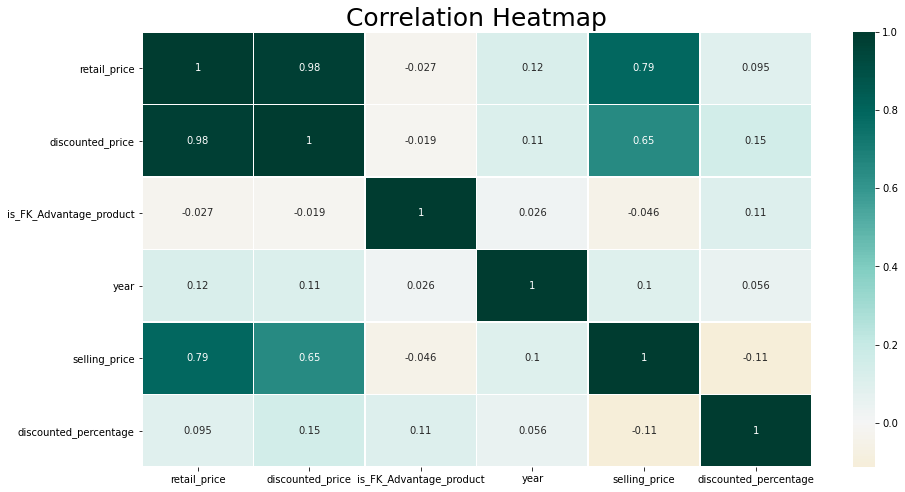

In [29]:
plt.figure(figsize= (15,8))
sns.heatmap(data.corr(), annot= True , linewidths=0.5,center=0, cmap='BrBG')
plt.title("Correlation Heatmap", fontsize = 25)
plt.show()

Heatmap show that stronger correlation of the spectrum pops out in darker, weaker correlation in lighter shades.


.  

Now, we plot the product in each year. 

In [30]:
# getting launch dates for each product
launchDates = data["year"]
uniqueDates = set(launchDates.copy())

In [31]:
noOfProducts = []
for i in uniqueDates:
    noOfProducts.append( len( [j for j in launchDates if j == i] ) )

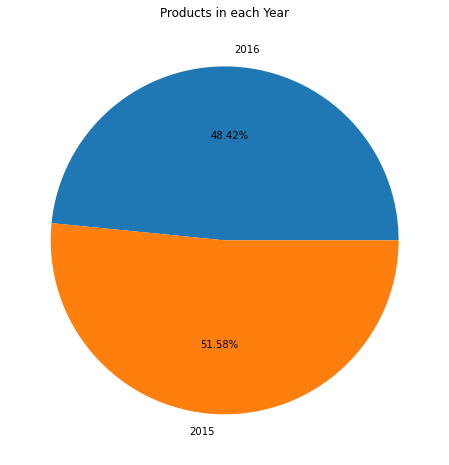

In [32]:
plt.figure(figsize=(8,8))
plt.pie(noOfProducts, labels=uniqueDates, autopct='%1.2f%%')
plt.title('Products in each Year')
plt.show()

From above plot show that 51.58% products launch in 2015 & 48.42% products in 2016.

In [34]:
# Price Distribution
price = list(data["retail_price"])
price.sort()

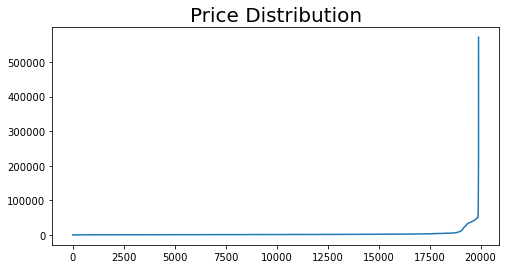

In [42]:
plt.figure(figsize=(8,4))
plt.plot(price)
plt.title('Price Distribution', fontsize = 20)
plt.show()

.

Now, we plot 10 most popular categories or categories with most number of items

In [43]:
# cleaning Primary Category for replace some unnecessary character 
cat = list(data["Primary_category"])
cat = [i.replace("\"", "").replace("]", "") for i in cat]

In [44]:
uniqueCat = set(cat)
countCat = []
for i in uniqueCat:
    countCat.append([i, len([ j for j in cat if j == i ])])

In [45]:
countCat = pd.DataFrame(countCat)
countCat = countCat.sort_values(by=[1])

In [46]:
# 10 most popular categories or categories with most number of items
topTen = countCat.iloc[-10:]

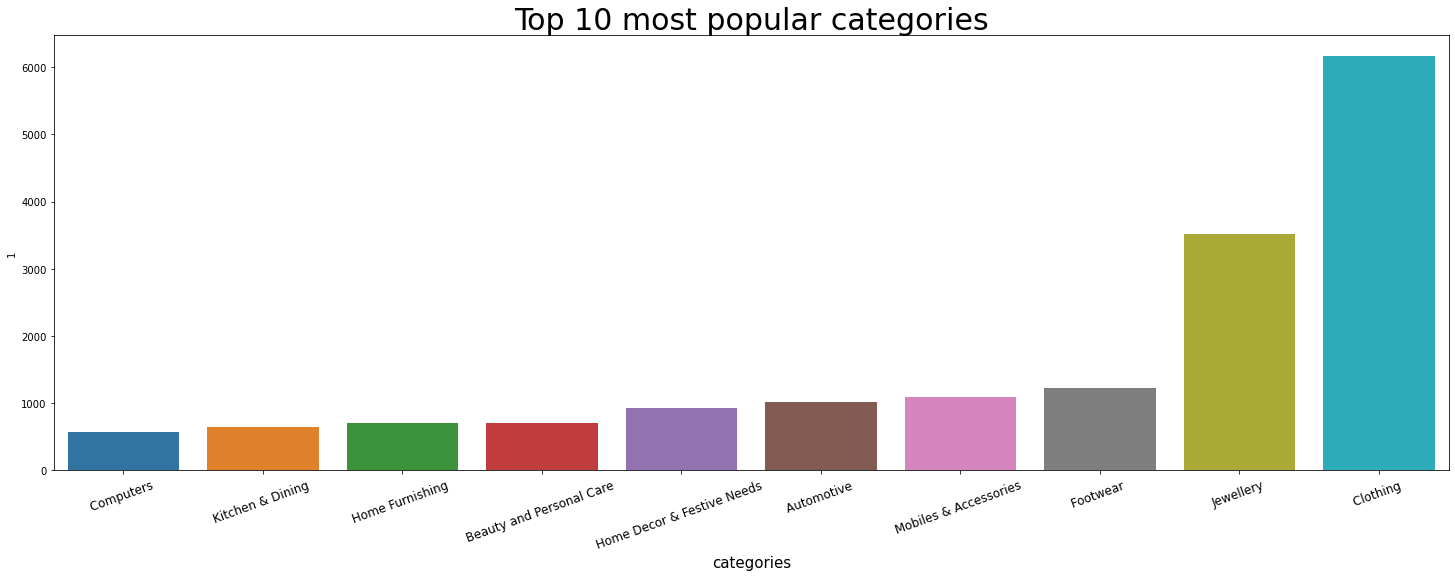

In [47]:
plt.figure(figsize=(25,8))
sns.barplot(topTen[0], topTen[1])
plt.title("Top 10 most popular categories", fontsize = 30)
plt.xlabel("categories" , fontsize= 15 )
plt.xticks(rotation = 20, fontsize = 12)
plt.show()

.

Now, we plot brands with most products.

In [48]:
# brands with most products
brands = data["brand"]
brands = list(brands[brands != "missing"])

In [49]:
uniqueBrands = set(brands)
countBrands = []
for i in uniqueBrands:
    countBrands.append( [ i, len([j for j in brands if j == i]) ] )

In [50]:
countBrands = pd.DataFrame(countBrands)
countBrands = countBrands.sort_values(by=[1])

In [51]:
# 10 brands with most probucts
topTen = countBrands.iloc[-10:]

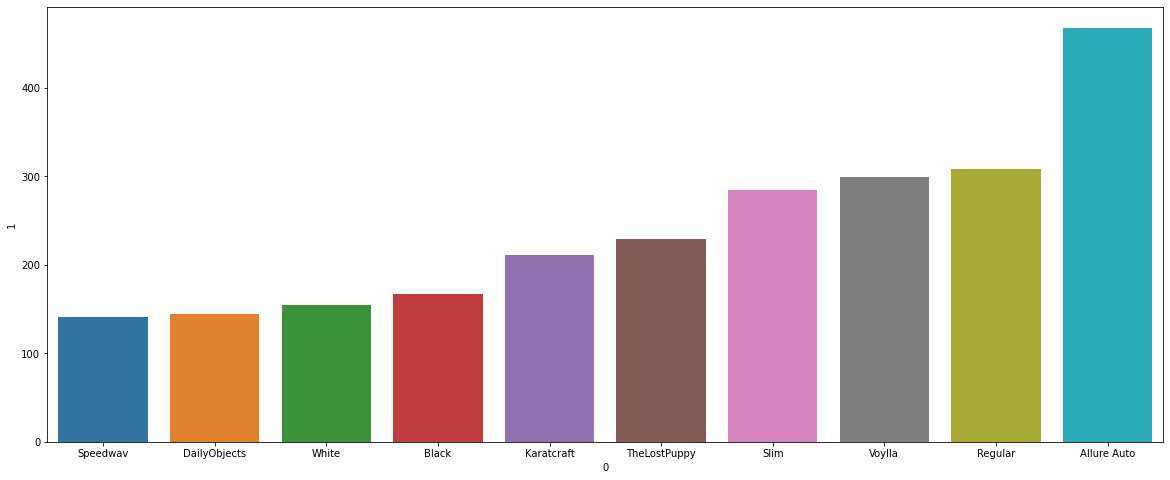

In [52]:
plt.figure(figsize=(20,8))
sns.barplot(topTen[0], topTen[1])
plt.show()

In [53]:
# Brands with least average discount
dis = data[["discounted_percentage", "brand"]]

In [54]:
# uniqueBrands
avgDisc = []
for i in uniqueBrands:
    x = dis[dis["brand"] == i]["discounted_percentage"]
    avgDisc.append( [i, sum(x)/len(x)])

In [55]:
avgDisc = pd.DataFrame(avgDisc)
avgDisc = avgDisc.sort_values(by=[1])

In [56]:
# TOP 20 companies with least discount
plotData = avgDisc[:20]

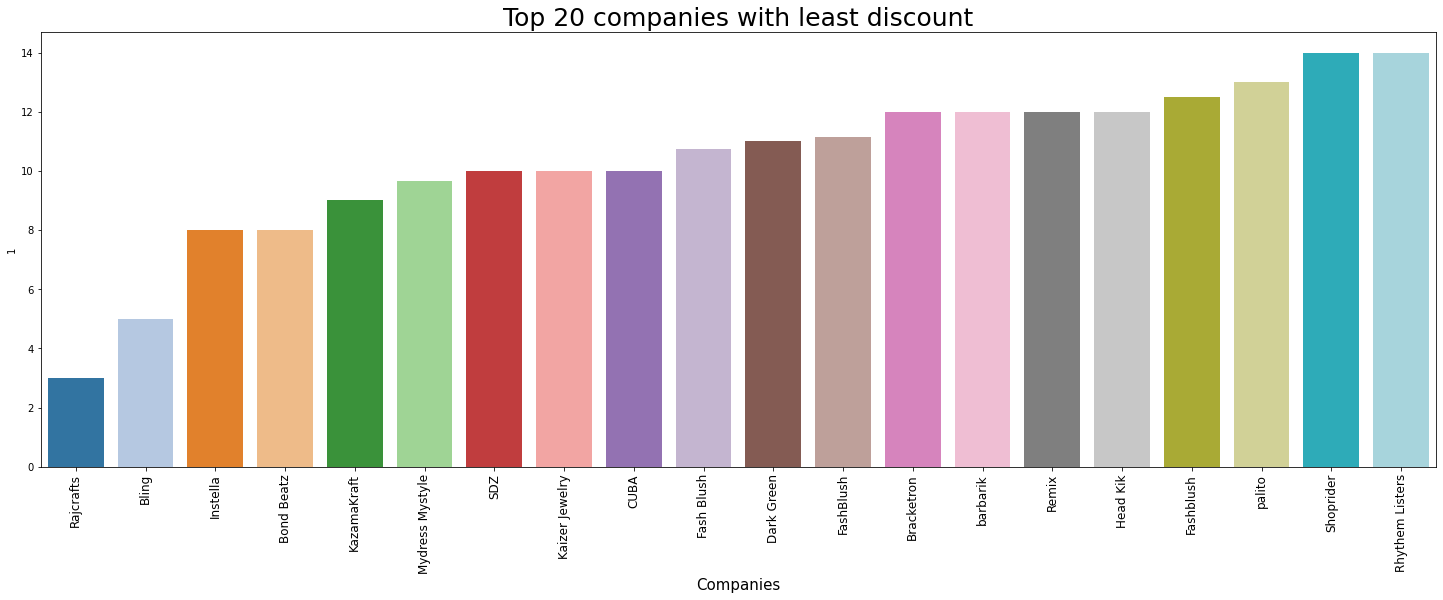

In [57]:
plt.figure(figsize=(25,8))
sns.barplot(plotData[0], plotData[1], palette= 'tab20')
plt.title("Top 20 companies with least discount", fontsize = 25)
plt.xlabel("Companies", fontsize=15)
plt.xticks(rotation = 90, fontsize = 12)
plt.show()

.

Top 5 most common brand names 

In [59]:
# Top 5 most brands
data["brand"].value_counts()[:6]

missing         5847
Allure Auto      468
Regular          308
Voylla           299
Slim             284
TheLostPuppy     229
Name: brand, dtype: int64

Observation : 
1. 5847 brand are missing. so we are not consider it
2. Allure Auto is the highest. 
3. Now, we plot it. by the help of seaborn library use countplot function than plot it. 

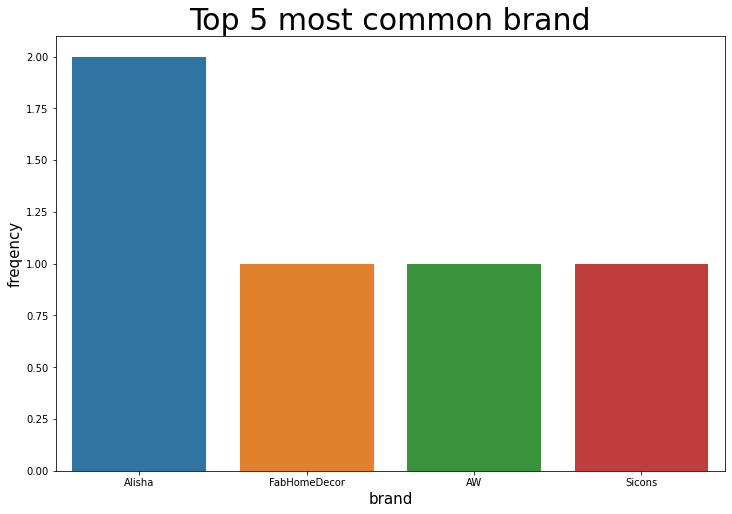

In [60]:
plt.figure(figsize=(12,8))
sns.countplot(data["brand"][:5])
plt.title("Top 5 most common brand" , fontsize = 30 )
plt.xlabel("brand", fontsize = 15)
plt.ylabel("freqency", fontsize = 15)
plt.xticks(rotation = 0)
plt.show()

.

# Step 4. Predict the Product category

Preprocessing

brand and Secondary_category is in string format so first we convert a brand column to encoded variable to a new column & then Secondary_category to encoded variable to a new column.

In [61]:
# First we convert the format of brand from object to category 
data["brand"] = data["brand"].astype('category')

In [62]:
# then we use cat.codes function to convert the categorical values to encode variable
data["brand_encode"] = data["brand"].cat.codes

In [63]:
# Now brand is encoded
data["brand_encode"].head()

0     163
1     915
2      70
3     163
4    2652
Name: brand_encode, dtype: int16

In [64]:
data["Secondary_category"] = data["Secondary_category"].astype('category')

In [65]:
data["product_category_encode"] = data["Secondary_category"].cat.codes

In [66]:
data["product_category_encode"].head(3)

0    214
1    126
2    215
Name: product_category_encode, dtype: int16

The next step is to split our dataset into its attributes and labels.

The x variable contains the three columns of the dataset while y contains the labels. 
x contains retails price, discounted percentage & brand_encode while y contains product category encode.

In [67]:
# using product_category_encode as labels to classify => y
# retail_price, discounted_percentage, brand_encode as input data => x
df = data[["retail_price", "discounted_percentage", "brand_encode", "product_category_encode"]]
df = df.dropna()
x = data[["retail_price", "discounted_percentage", "brand_encode"]]
y = data["product_category_encode"]

In [68]:
# x.head()
# y.head()
TrainAcc = []
TestAcc = []

Train Test split

To avoid over-fitting, we'll divide our dataset into training and test splits, which gives us a better idea as to how our algorithm performed during the testing phase. This way our algorithm is tested on un-seen data. So, by the help of sklearn library we use train_test_split function. we splits the dataset into 70% train data and 30% test data.

In [69]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

First we use KNN algorithm, it is extremely straight forward to train the KNN algorithm. The first step is to import the KNeighborsClassifier class from the sklearn.neighbors library.

In [70]:
# KNN
knn = KNeighborsClassifier()

In [71]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

Now, we check the accuracy of KNN classifier on training & test set. The score() method allows us to calculate the mean accuracy for the data. So, by the help of score method, we'll find the accuracy.

In [72]:
a = knn.score(X_train, y_train)
b = knn.score(X_test, y_test)
TrainAcc.append(a)
TestAcc.append(b)
print(f"Accuracy of K-NN classifier on training set => { a }")
print(f"Accuracy of K-NN classifier on test set     => { b }") 

Accuracy of K-NN classifier on training set => 0.6423598650685423
Accuracy of K-NN classifier on test set     => 0.5279638312123242


Observation:
In above code we use kNN method to find the accuracy of our train & test data. The accuracy of training set is 0.65 & test set is 0.52. So, it show the low accuracy which is not good. 

Now, We use another method to find high accuracy.

We use decision tree, this method is used for classfication & regression. The first step is to import the DecisionTreeClassifier & takes as input X_train and y_train.

In [73]:
# USING DECISION TREE
clf = DecisionTreeClassifier().fit(X_train, y_train)

In [74]:
a = clf.score(X_train, y_train)
b = clf.score(X_test, y_test)
TrainAcc.append(a)
TestAcc.append(b)
print(f"Accuracy of Decision Tree classifier on training set => { a }")
print(f"Accuracy of Decision Tree classifier on test set => { b }")

Accuracy of Decision Tree classifier on training set => 0.9385631235197014
Accuracy of Decision Tree classifier on test set => 0.6445077026121903


Observation: In above code we use decision tree to find the accuracy of our train & test data. The accuracy of training set is 0.93 & test set is 0.64. So, it show the high accuracy which is good.

Now, we use the another method to improve the accuracy.

We use Gaussian Naive Bayes method to find the accuracy of our train & test data. The first step to import the GaussianNB() for classification & takes as input X_train and y_train.

In [75]:
# USING Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [76]:
a = gnb.score(X_train, y_train)
b =  gnb.score(X_test, y_test)
TrainAcc.append(a)
TestAcc.append(b)
print(f"Accuracy of GNB classifier on training set => { a }")
print(f"Accuracy of GNB classifier on test set => { b }")

Accuracy of GNB classifier on training set => 0.24244599153089788
Accuracy of GNB classifier on test set => 0.22940388479571333


Observation: In above code we use Gaussian Naive Bayes to find the accuracy of our train & test data. The accuracy of training set is 0.24 & test set is 0.22. So, it show very low accuracy which is not good.

Now, we plot the graph to show the comparsion of different method to find accuracy & which one of the following has the highest accuracy.

1. TrainAcc = It show the accuracy of all train dataset in different method.
2. TestAcc  = It show the accuracy of all test dataset in different method.

In [77]:
[TrainAcc, TestAcc]

[[0.6423598650685423, 0.9385631235197014, 0.24244599153089788],
 [0.5279638312123242, 0.6445077026121903, 0.22940388479571333]]

With the help of TrainAcc & TestAcc, we plot the bar graph to show the highest accuracy. 

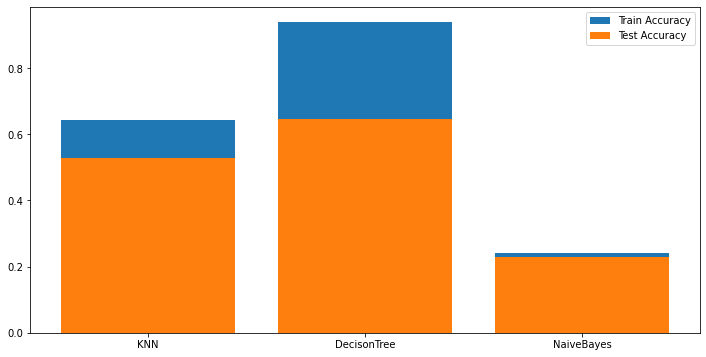

In [78]:
labels = ["KNN", "DecisonTree", "NaiveBayes"]

plt.figure(figsize=(12,6))
plt.bar(labels, TrainAcc, label="Train Accuracy")
plt.bar(labels, TestAcc, label="Test Accuracy")

plt.legend()

plt.show()

Conclusion : 
From above graph show that Decison tree has high accuracy than knn & NaiveBayes. 